In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./rainfall in india 1901-2015.csv')

def cleandata(area,starttime,endtime):
    cond1 = (df['SUBDIVISION']==area)
    cond2 = (df['YEAR']>=starttime)
    cond3 = (df['YEAR']<=endtime)
    
    data = df[cond1&cond2&cond3]
    data = data.drop(['SUBDIVISION','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL'],axis=1)
    data = data.melt(['YEAR']).reset_index()
    data = data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
    data.columns=['INDEX','YEAR','Month','rainfall']
    d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
       'OCT':10,'NOV':11,'DEC':12}
    data['Month']=data['Month'].map(d)
    data['Date']=pd.to_datetime(data.assign(Day=1).loc[:,['YEAR','Month','Day']])
    return data

location = 'HARYANA DELHI & CHANDIGARH'
years = []
for year in range(1905,2015,10):
    years.append(year)    
    
print(years)
decable_data = []

for year in years:
    decable_data.append(cleandata(location,year,year+9))



[1905, 1915, 1925, 1935, 1945, 1955, 1965, 1975, 1985, 1995, 2005]


In [3]:
def plotgraph(data):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.rcParams['axes.xmargin'] = 0.1
    x = data['Date']
    y = data['rainfall']
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('rainfall')
    plt.title('rainfall on monthly basis')
    plt.show()

In [4]:
fft_amp_60 = []

def calcfftandplot(data):
    x = data['Date']
    y = data['rainfall']
    fft_y = np.fft.fft(y)
    fft_y_ = np.abs(fft_y)
    fft_y_power = np.abs(fft_y_)**2

    #1/120 coz its month
    freq = np.fft.fftfreq(len(x),1/120)

    plt.plot(freq,fft_y_power,'green')

    plt.xlabel('Freq')
    plt.ylabel('Amplitude/power')
    plt.title('fft of the rainfall')
    
    plt.show()
    print(fft_y_power.shape)
    print(fft_y_power[-1])
    fft_amp_60.append(fft_y_power[-1])
    return fft_y,freq


In [5]:
#plotting fft
# fft_y_  = np.abs(fft_y)
# plt.plot(freq,fft_y_**2)
# plt.plot(freq,(fft_y.real)**2,'yellow')

# plt.show()

# #plotting ifft
# ifft_data = np.fft.ifft(fft_y)
# time = data['Date']
# plt.plot(time, ifft_data.real)
# plt.xlabel('Time')
# plt.ylabel('Rainfall (mm)')
# plt.title('Inverse FFT of Indian Rainfall')
# plt.show()

In [6]:
# threshold = 1000000
# newarr = []
# newfft = np.array([])
# for a in range(len(fft_y)):
#     temp = abs(fft_y[a].real)**2
#     tempfft = fft_y[a]
#     if temp > threshold:
#         temp = 0
#         tempfft = 0 + 0j
        
#     newarr.append(temp)
#     newfft = np.append(newfft,tempfft)

# plt.plot(freq,(fft_y.real)**2,'red')
# plt.plot(freq,(newfft.real)**2,'yellow')
# plt.show()




In [7]:
# newifft = np.fft.ifft(newfft)
# ifft_y = np.fft.ifft(fft_y)

# plt.plot(time,newifft.real,'red')
# plt.plot(time,ifft_y.real,'green')
# plt.plot(time,data['rainfall'],'pink')

# plt.show()

# print(data)


In [8]:
def calcfft(signal):
    fft_y = np.fft.fft(signal)
    fft_y_ = np.abs(fft_y)
    fft_y_power = np.abs(fft_y_)**2

    #1/120 coz its month
    freq = np.fft.fftfreq(len(signal),1/120)

    plt.plot(freq,fft_y_power)
    plt.xlabel('Freq')
    plt.ylabel('Amplitude/power')
    plt.title('fft of the rainfall (removing the high frequency)')
    
    plt.show()
    return fft_y,freq

    
    


def plotforlowerfreq(fft_y,time,data,freq):
    threshold = 1000000
    newarr = []
    newfft = np.array([])
    for a in range(len(fft_y)):
        temp = abs(fft_y[a].real)**2
        tempfft = fft_y[a]
        if temp > threshold:
            temp = 0
            tempfft = 0 + 0j

        newarr.append(temp)
        newfft = np.append(newfft,tempfft)
    
    plt.xlabel('harmonics')
    plt.ylabel('Amplitude/power')
    plt.title('fft of the rainfall (with high frequency removed)')    
    plt.plot(freq,np.abs(newfft.real)**2);
    plt.show();
    newifft = np.fft.ifft(newfft)
    ifft_y = np.fft.ifft(fft_y)
    
    plt.xlabel('Time')
    plt.ylabel('Rainfall (mm)')
    plt.title('Inverse FFT of Indian Rainfall (with high frequencies removed)')
    plt.plot(time,newifft.real,'red')
    plt.plot(time,ifft_y.real,'green')
    plt.plot(time,data['rainfall'],'pink')
    plt.show()
    return newifft.real
    #calculating error
#     pds = pd.Series(data['rainfall'])
#     pds=pds.to_numpy(dtype ='float32');
#     print(type(pds))
#     print(type(newifft.real))
#     error = np.abs(pds-newifft.real)
#     reference_value = 1e-6
#     print("the mean error is",np.mean(error))
#     print("one value",error[0]/pds[0]*100)
#     print("the % error is",np.mean((error/(pds+reference_value))*100) )
#     calcfft(newifft)
    
    

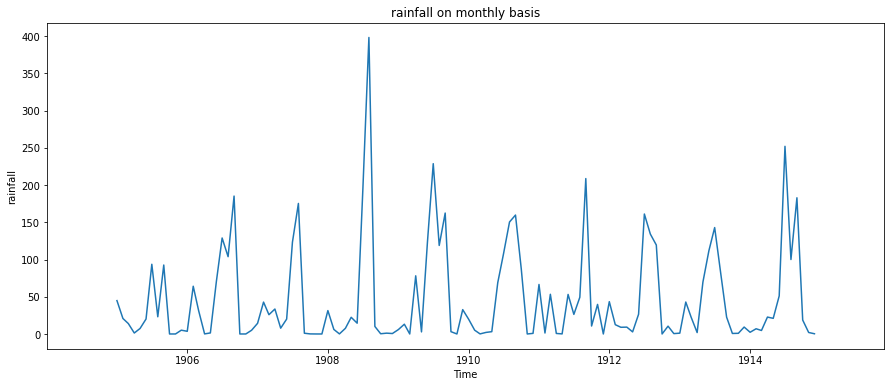

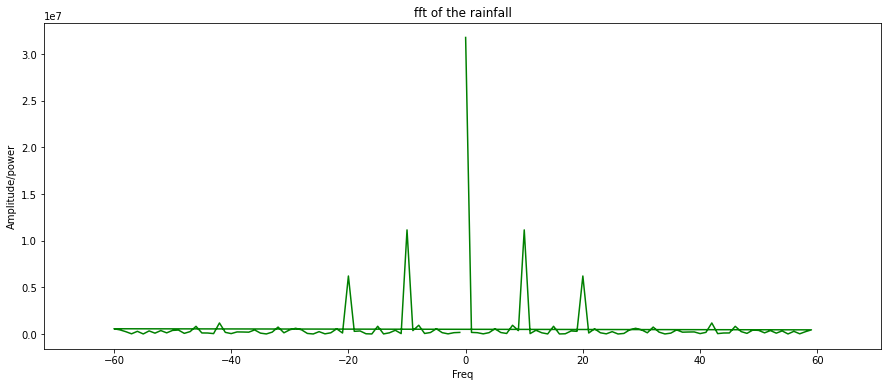

(120,)
169005.83473613794


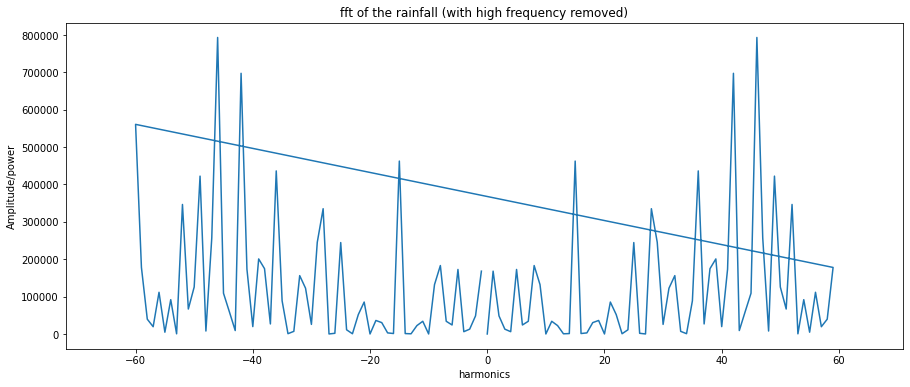

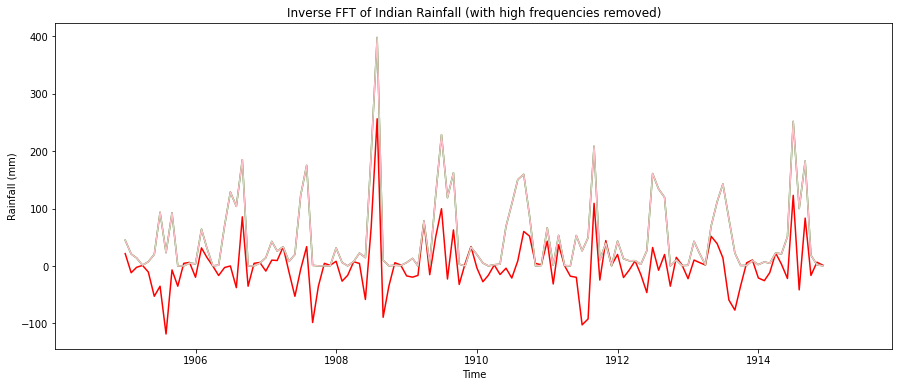

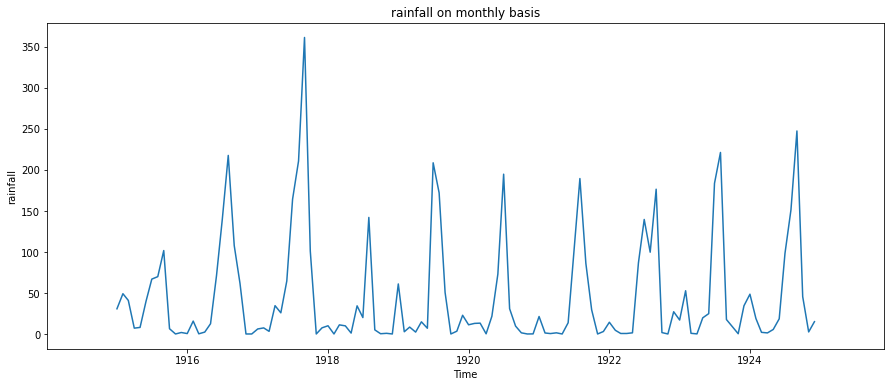

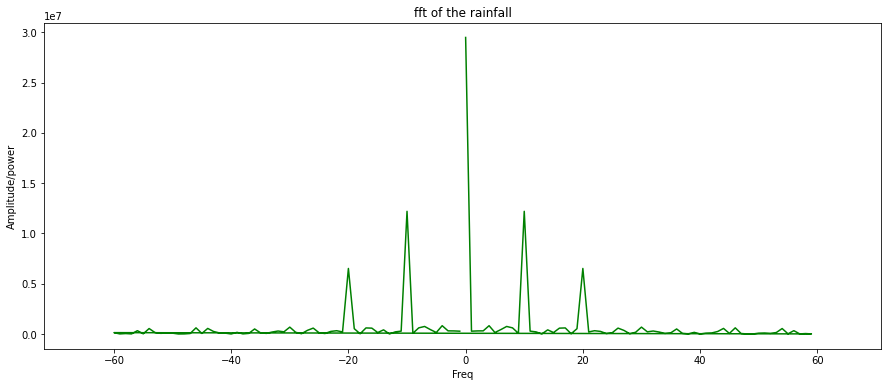

(120,)
279836.66263619874


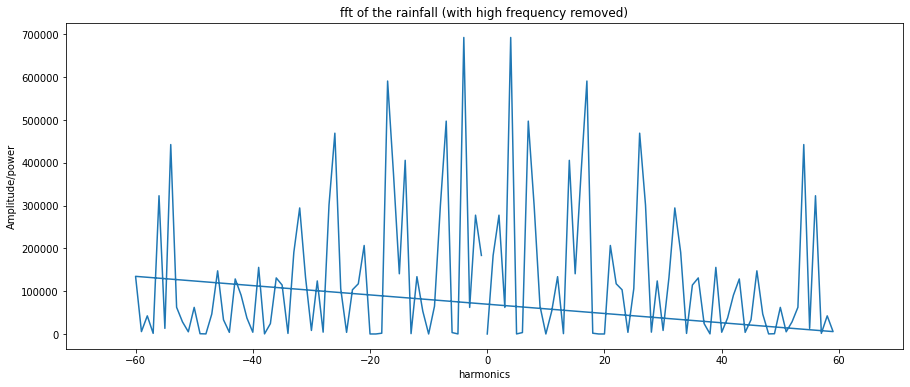

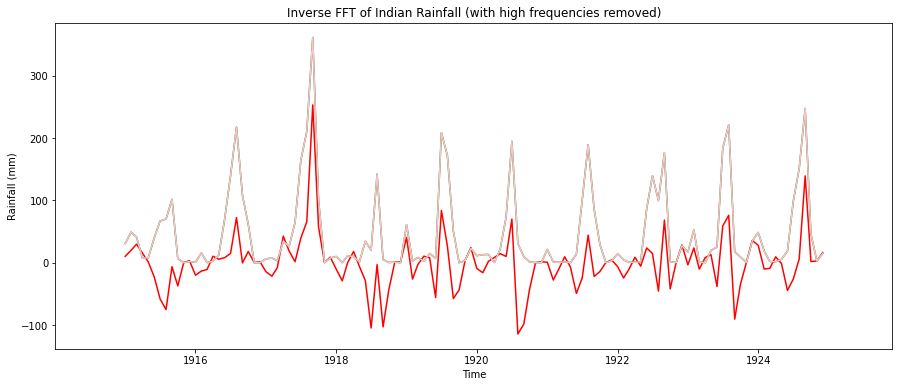

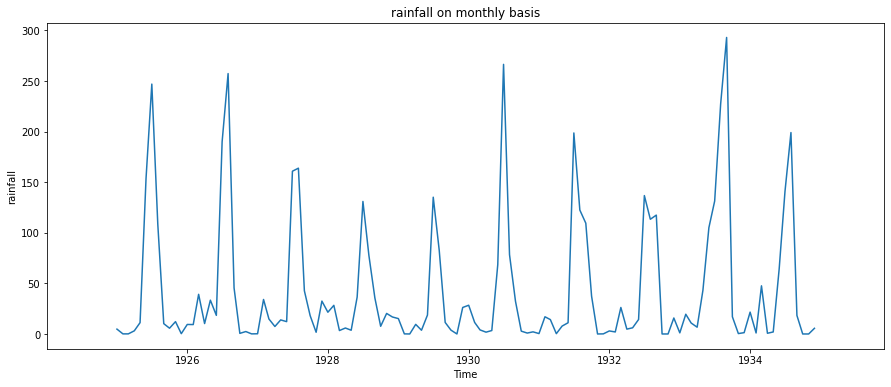

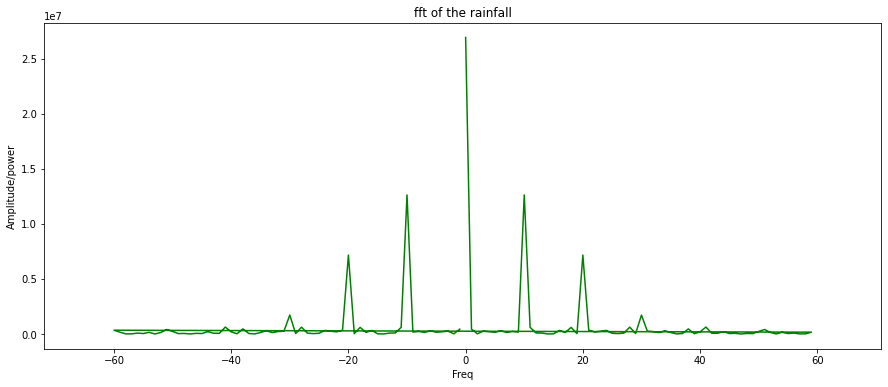

(120,)
443284.59674093215


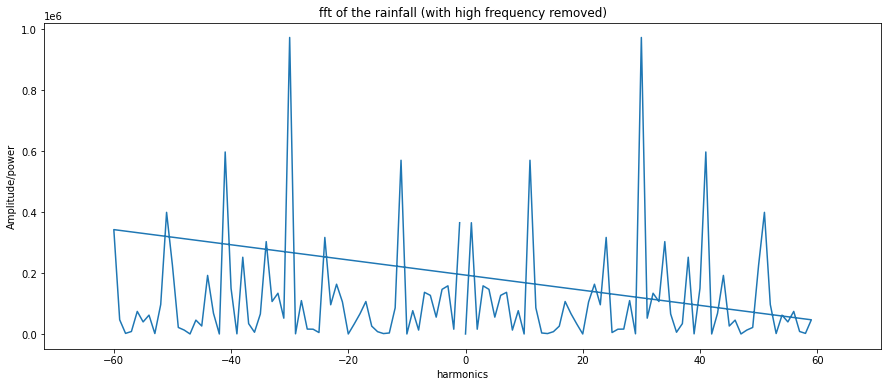

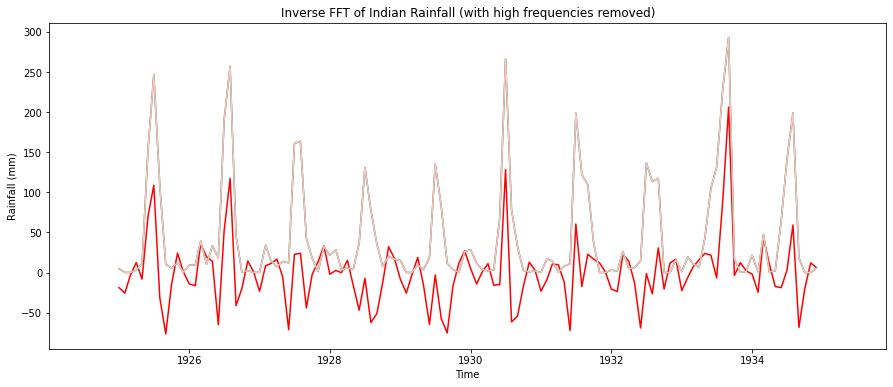

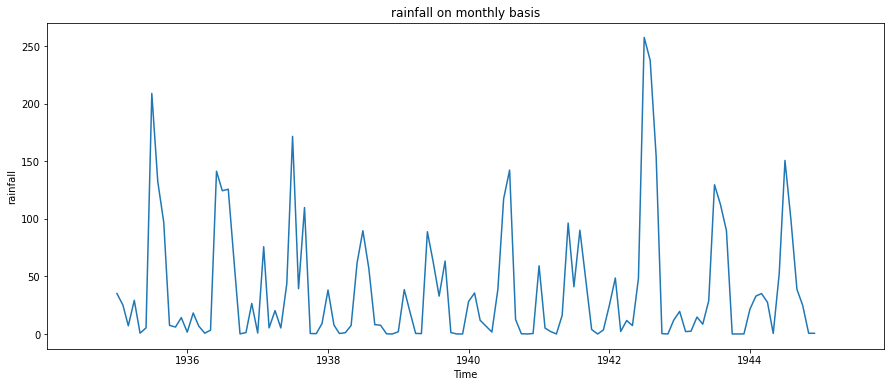

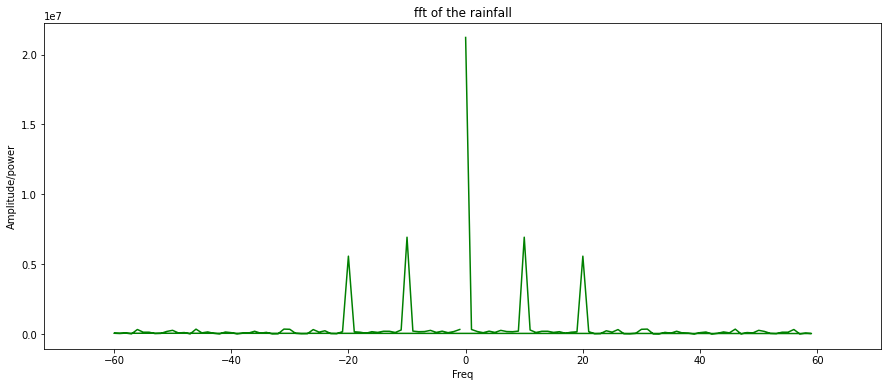

(120,)
323556.6361365828


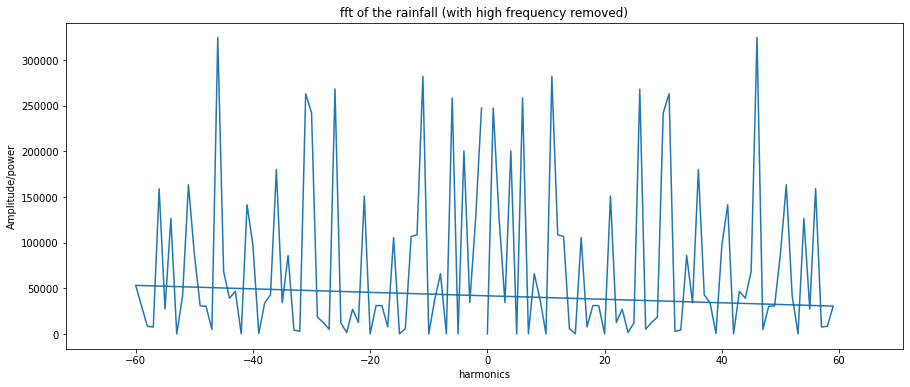

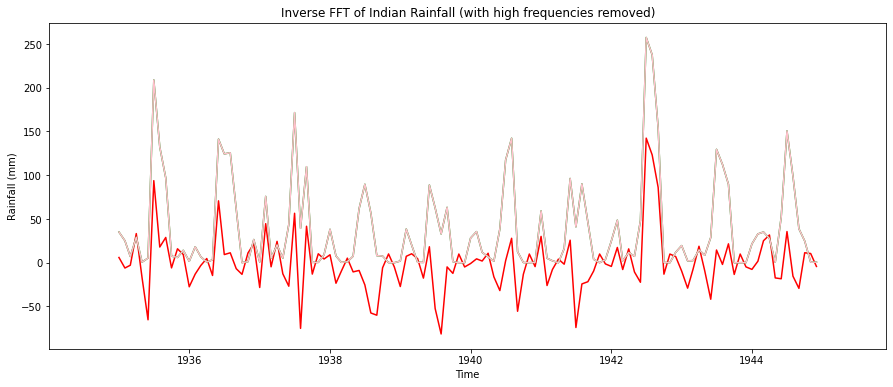

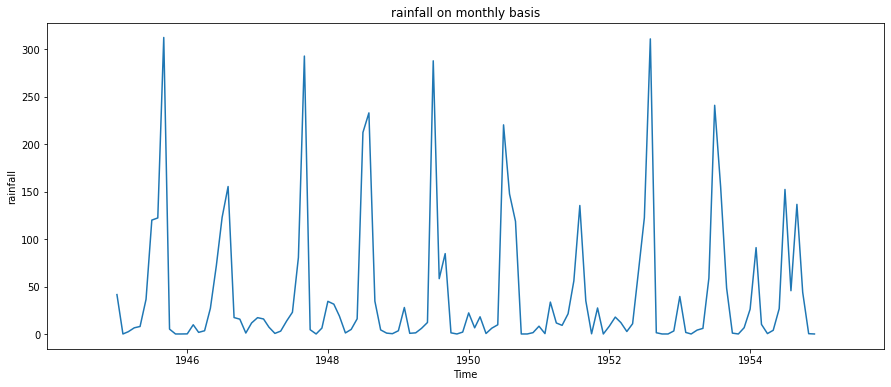

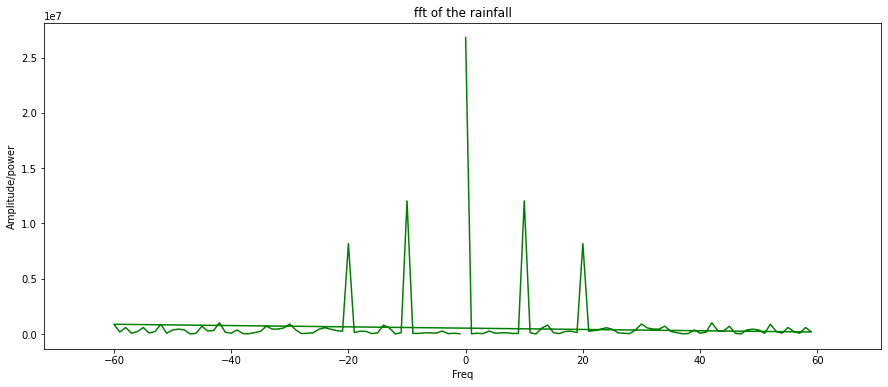

(120,)
24905.525492326986


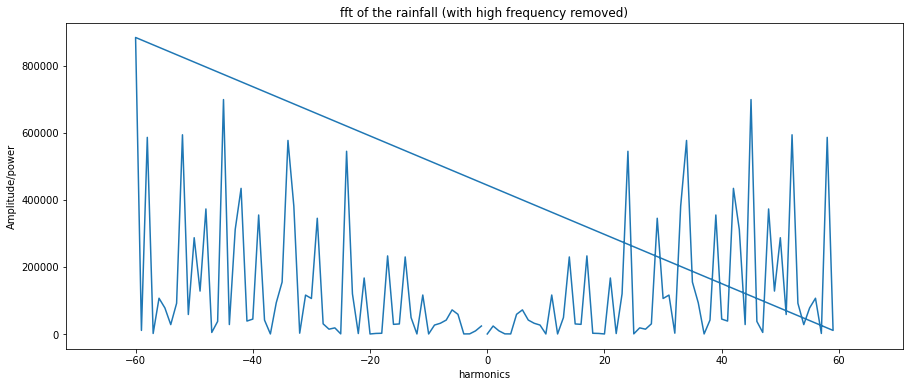

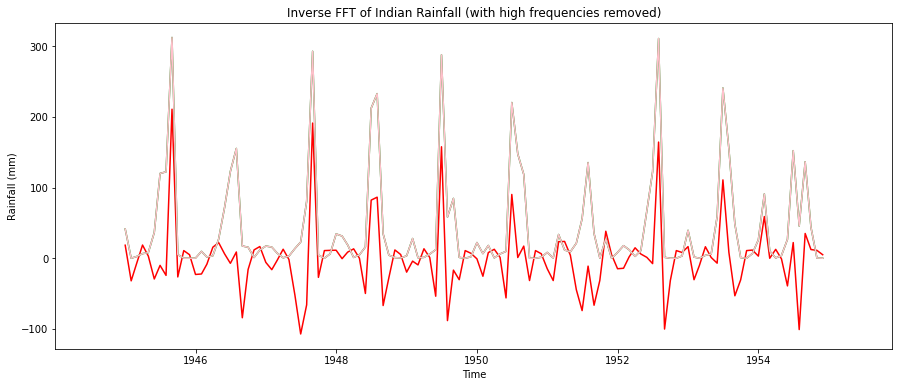

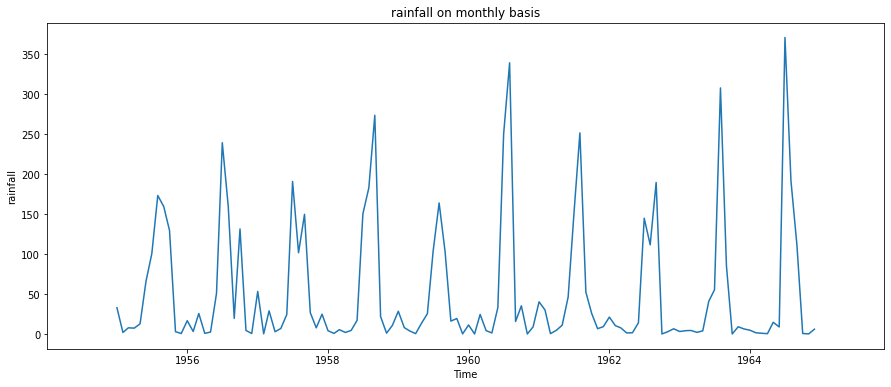

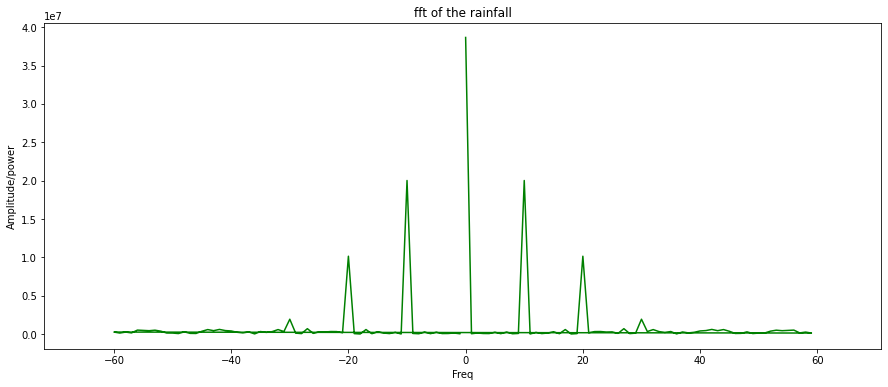

(120,)
43034.15261934466


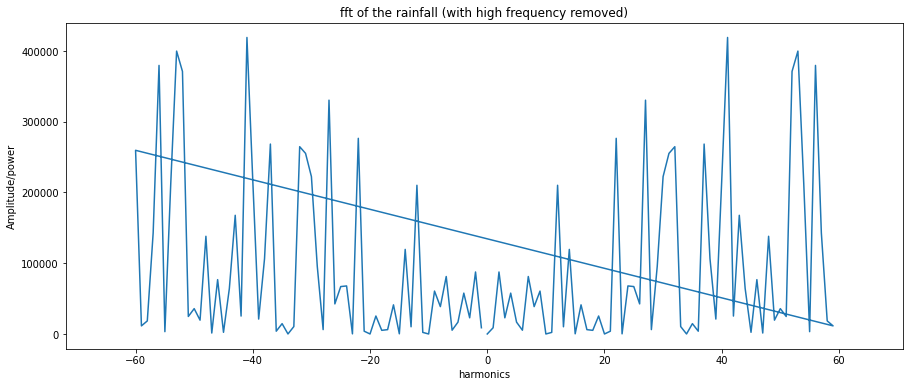

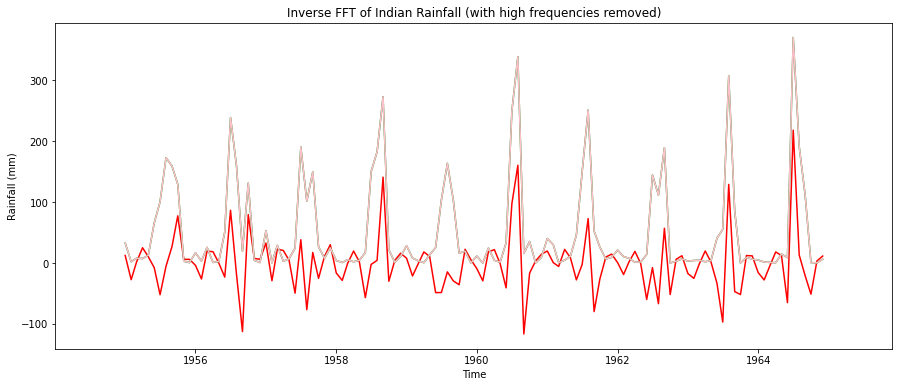

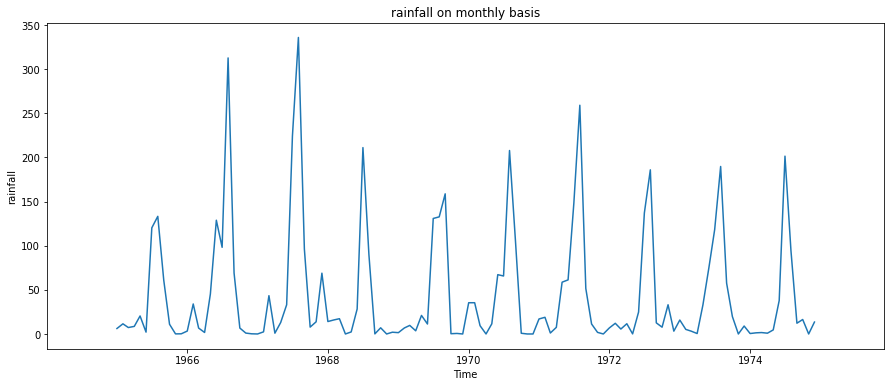

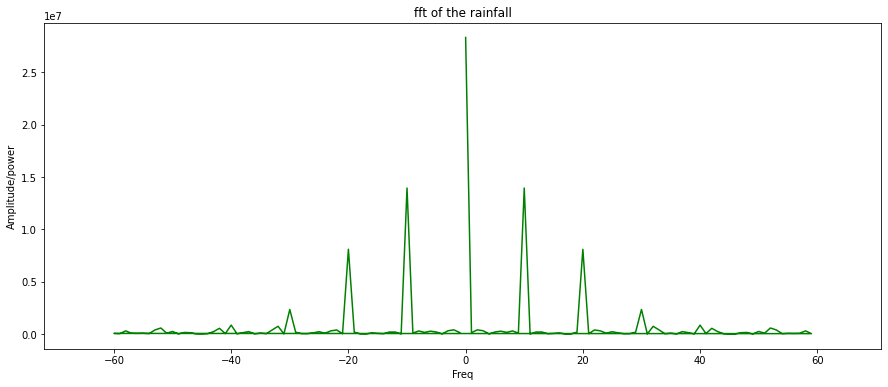

(120,)
129512.45133178297


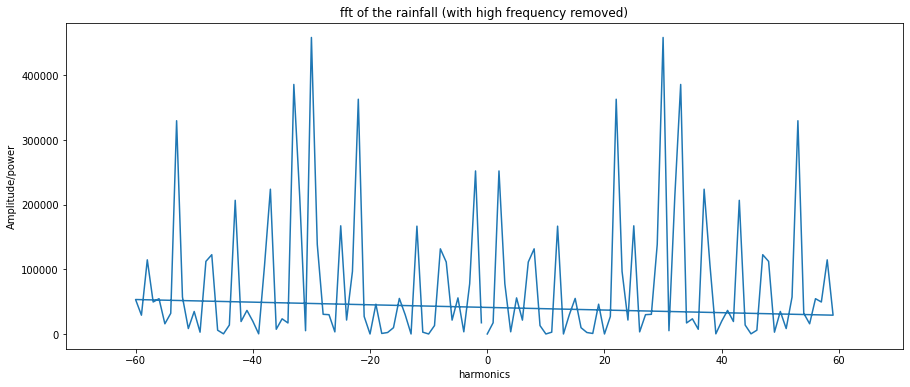

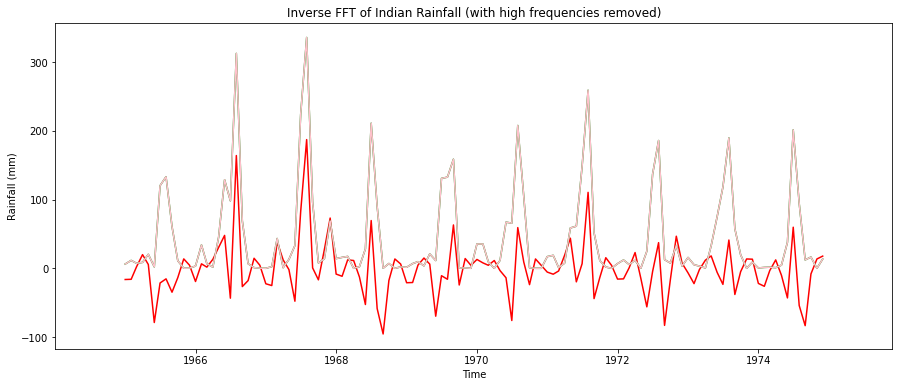

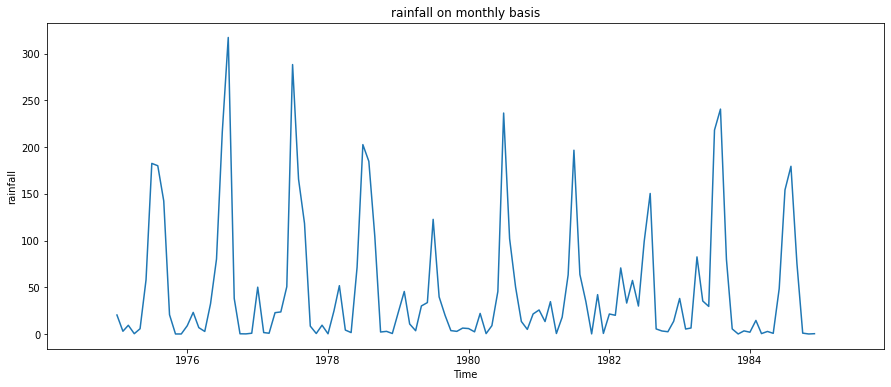

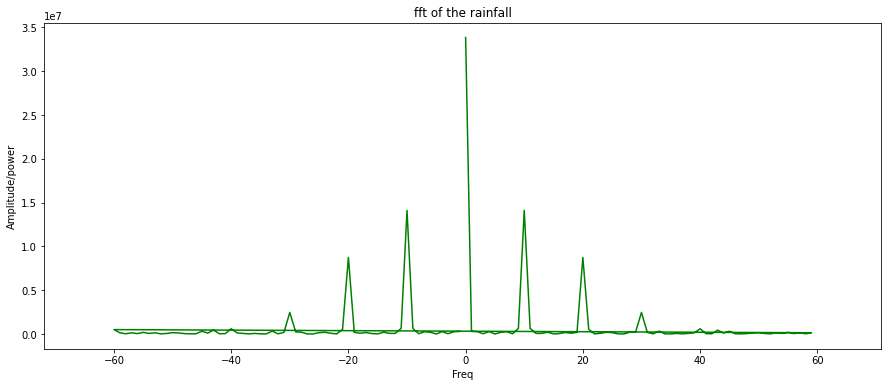

(120,)
294374.2074070951


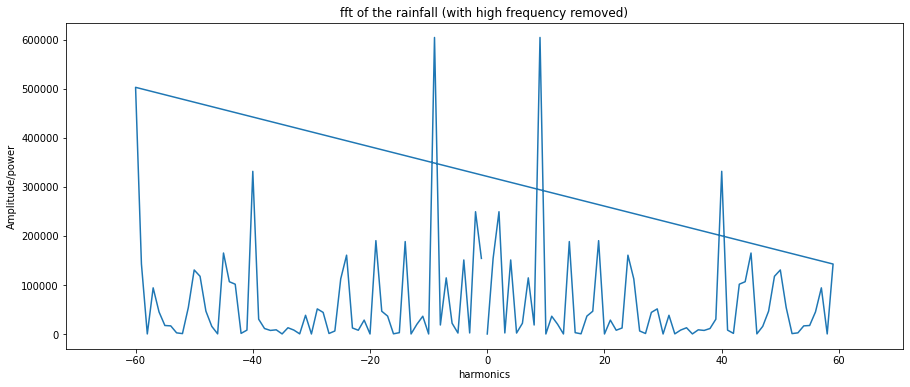

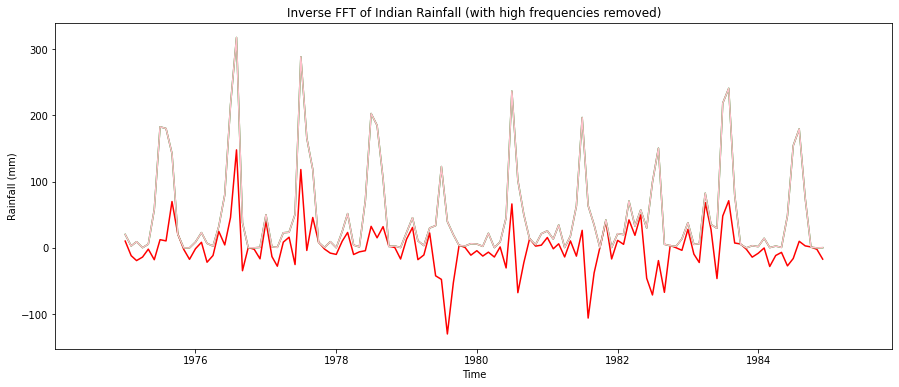

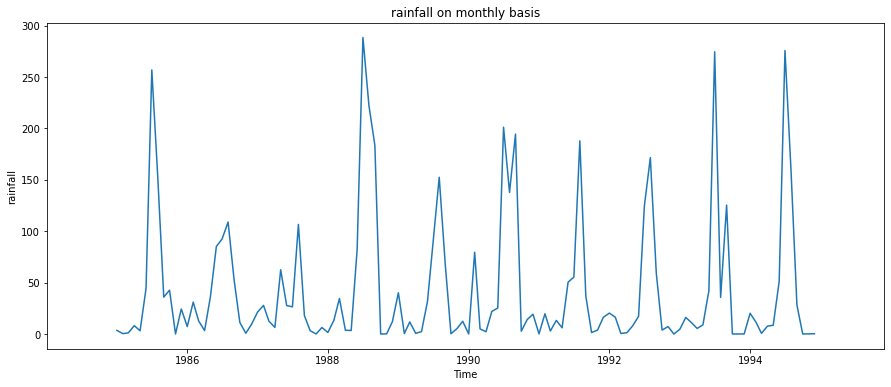

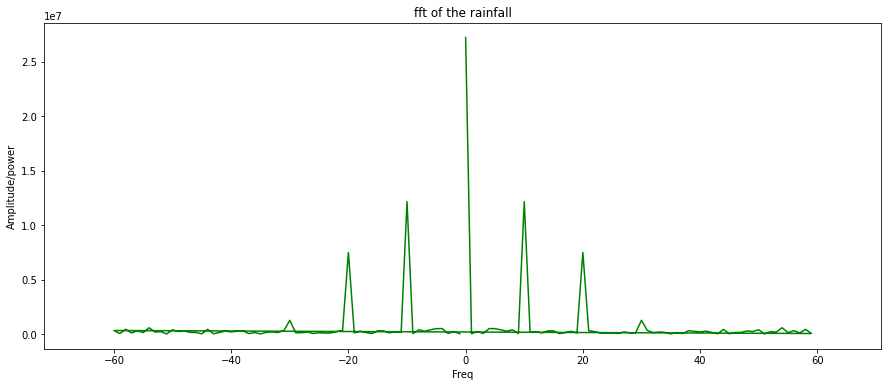

(120,)
23072.242787412408


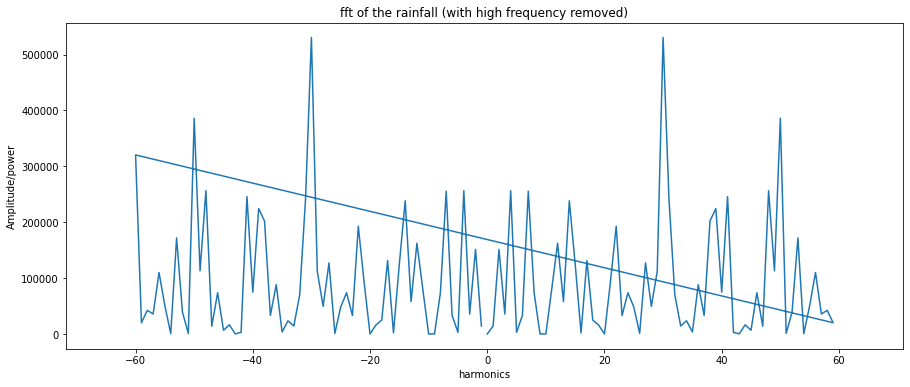

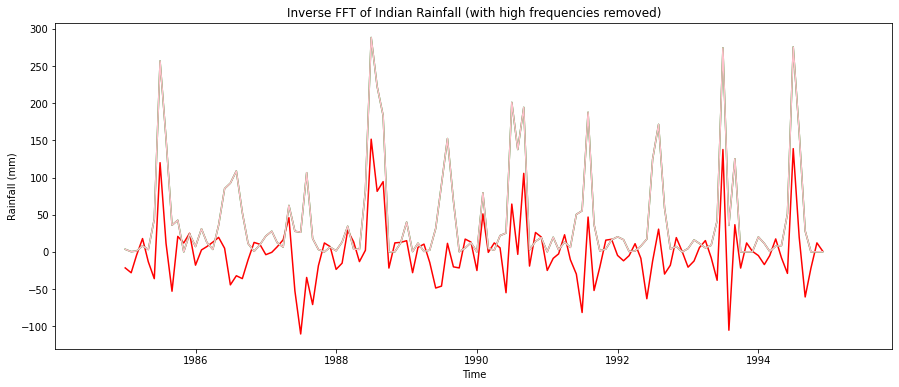

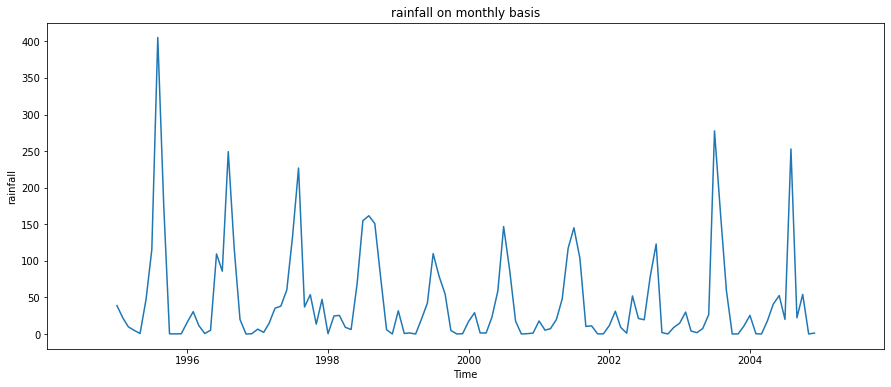

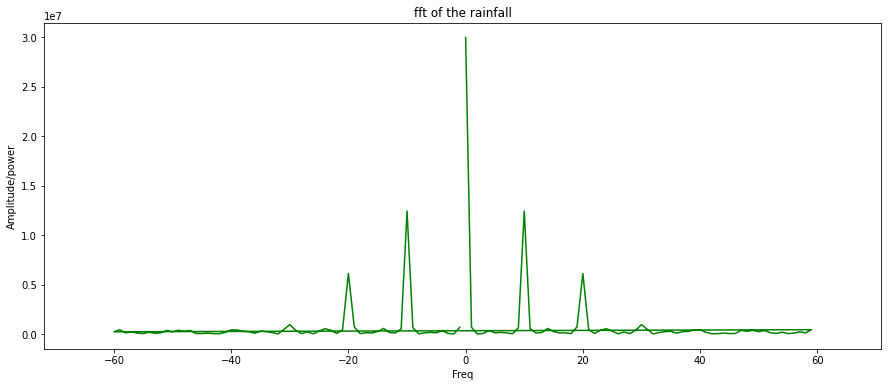

(120,)
685938.9700905725


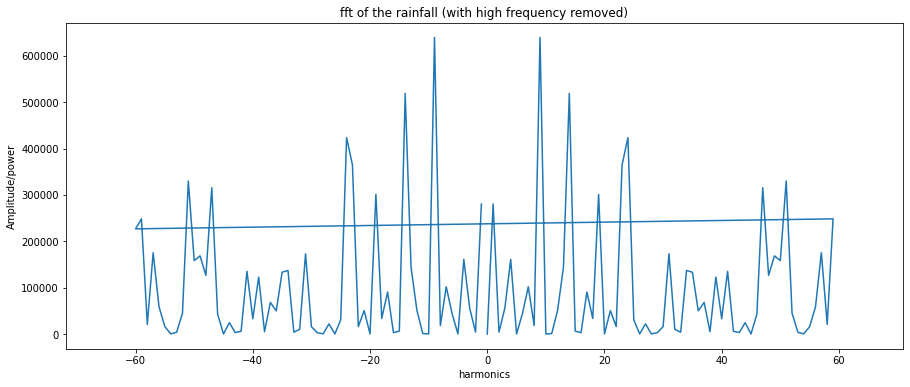

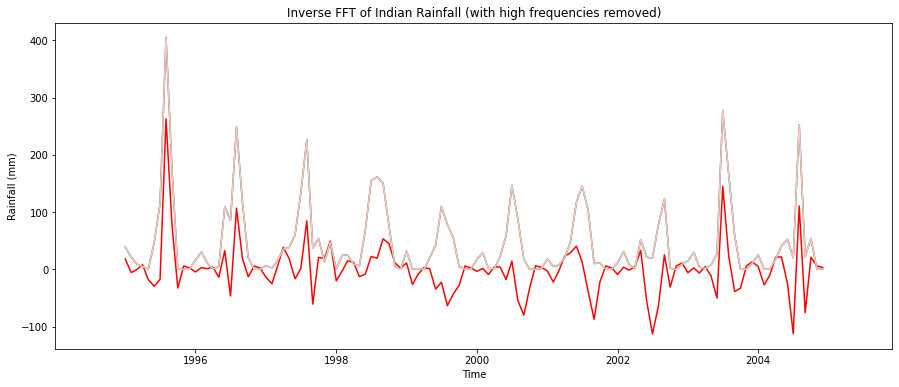

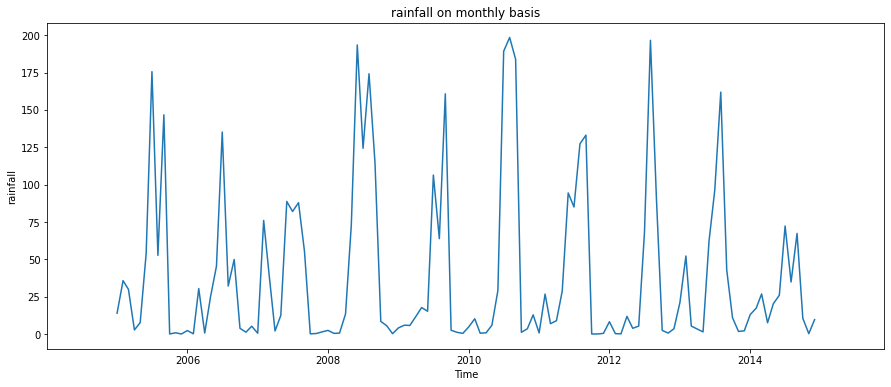

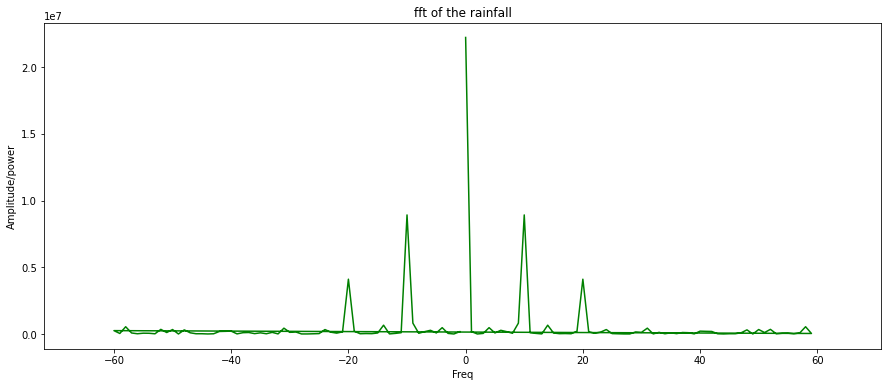

(120,)
175473.6401346817


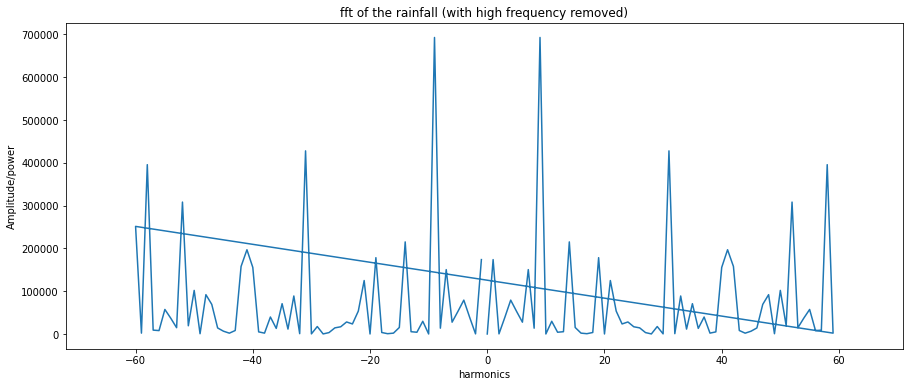

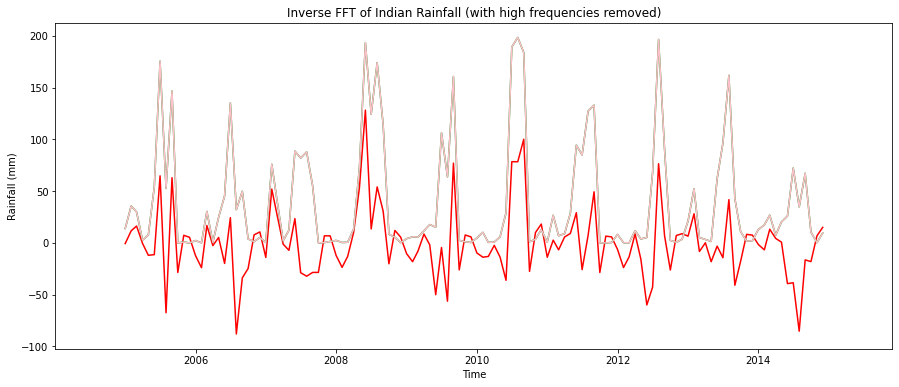

In [9]:
regenrated = np.array([])
sum = 0
for a in decable_data:
    plotgraph(a)
    fft_y,freq = calcfftandplot(a)
    lowf = plotforlowerfreq(fft_y,a['Date'],a,freq)
    regenrated = np.append(regenrated,lowf)
    sum = sum + lowf.shape[0]

In [10]:
print(sum)
print(regenrated.shape)
newdf = cleandata(location,1905,2014)
newdf.describe()

1320
(1320,)


,INDEX,YEAR,Month,rainfall
count,1320.000000,1320.000000,1320.000000,1320.000000
mean,659.500000,1959.500000,6.500000,44.548939
std,381.195488,31.764987,3.453361,66.919242
min,0.000000,1905.000000,1.000000,0.000000
25%,329.750000,1932.000000,3.750000,2.300000
50%,659.500000,1959.500000,6.500000,13.750000
75%,989.250000,1987.000000,9.250000,53.750000
max,1319.000000,2014.000000,12.000000,405.300000


In [ ]:
#################### RANDOM WORK NEXT

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [12]:
X = newdf[['YEAR','Month']]
y = newdf['rainfall']
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_train,y_train))
accuracy = r2_score(y_test, y_pred)

print("Model Accuracy (R-squared): {:.2f}".format(accuracy))

0.013000026890194638
Model Accuracy (R-squared): 0.02


In [13]:
regenrated.shape

(1320,)

In [14]:
regenrateddf = pd.DataFrame (regenrated)
filepath = 'regenrated_data.xlsx'
regenrateddf.to_excel(filepath, index=False)


11
[169005.83473613794, 279836.66263619874, 443284.59674093215, 323556.6361365828, 24905.525492326986, 43034.15261934466, 129512.45133178297, 294374.2074070951, 23072.242787412408, 685938.9700905725, 175473.6401346817]


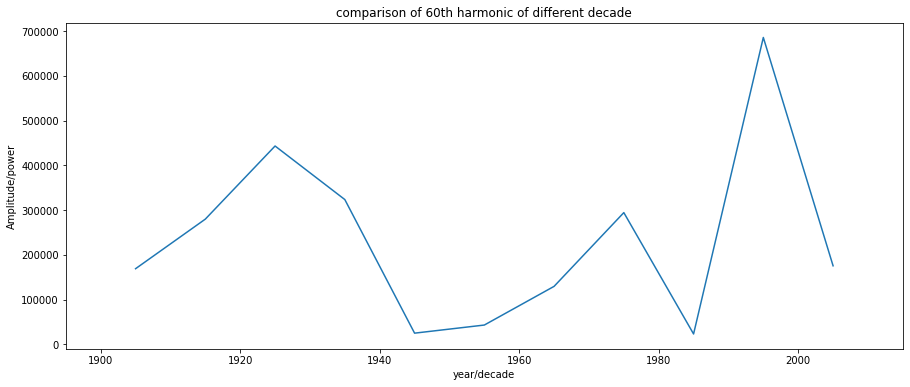

In [21]:
siz = len(fft_amp_60)
print(siz)
dec = []
for a in range(siz):
    dec.append(1905+10*a)


print(fft_amp_60)
plt.xlabel('year/decade')
plt.ylabel('Amplitude/power')
plt.title('comparison of 60th harmonic of different decade')    
plt.plot(dec,fft_amp_60)
plt.show()